# **Custom Knowledge ChatGPT with LangChain - Chat with PDFs**



0.   Installs, Imports and API Keys
1.   Loading PDFs and chunking with LangChain
2.   Embedding text and storing embeddings
3.   Creating retrieval function
4.   Creating chatbot with chat memory (OPTIONAL)








# 0. Installs, Imports and API Keys

In [1]:
# RUN THIS CELL FIRST!
# !pip install -q langchain==0.0.150 pypdf pandas matplotlib tiktoken textract transformers openai faiss-cpu

In [2]:
!pip install -q six beautifulsoup4

In [3]:
!pip install -q fastapi kaleido streamlit pypdf2 python-multipart uvicorn cohere

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!pip install -q langchain==0.0.316 pypdf pandas matplotlib tiktoken textract transformers openai==0.28.1 faiss-cpu anyio distro httpx pydantic sniffio tqdm typing-extensions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.0/284.0 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 29.0 MB/s et

In [5]:
!python --version

Python 3.10.12


In [6]:
!pip show openai

Name: openai
Version: 0.28.1
Summary: Python client library for the OpenAI API
Home-page: https://github.com/openai/openai-python
Author: OpenAI
Author-email: support@openai.com
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, requests, tqdm
Required-by: 


In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import openai
from transformers import GPT2TokenizerFast
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains.question_answering import load_qa_chain
from langchain.llms import OpenAI
from langchain.chains import ConversationalRetrievalChain

# 1. Loading PDFs and chunking with LangChain

In [9]:
# You MUST add your PDF to local files in this notebook (folder icon on left hand side of screen)

# Simple method - Split by pages
#loader = PyPDFLoader("/content/GOT.pdf")
#pages = loader.load_and_split()
#print(pages[0])

# SKIP TO STEP 2 IF YOU'RE USING THIS METHOD
#chunks = pages

In [10]:
# Advanced method - Split by chunk

# Step 1: Convert PDF to text
import textract
doc = textract.process("/content/GOT.pdf")

# Step 2: Save to .txt and reopen (helps prevent issues)
with open('GOT.txt', 'w') as f:
    f.write(doc.decode('utf-8'))

with open('GOT.txt', 'r') as f:
    text = f.read()

# Step 3: Create function to count tokens
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")

def count_tokens(text: str) -> int:
    return len(tokenizer.encode(text))

# Step 4: Split text into chunks
text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size = 500,
    chunk_overlap  = 24,
    length_function = count_tokens,
)

chunks = text_splitter.create_documents([text])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

In [11]:
# Result is many LangChain 'Documents' around 500 tokens or less (Recursive splitter sometimes allows more tokens to retain context)
type(chunks[0])

langchain.schema.document.Document

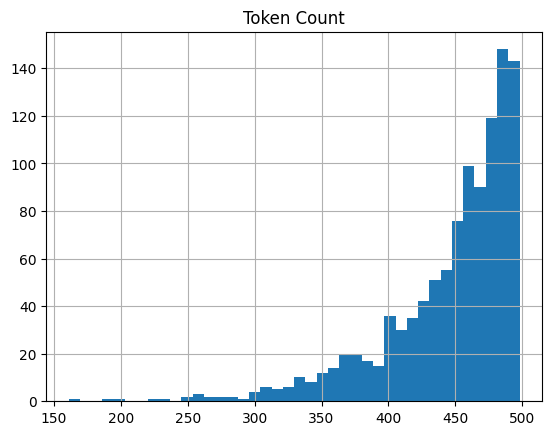

In [12]:
# Quick data visualization to ensure chunking was successful

# Create a list of token counts
token_counts = [count_tokens(chunk.page_content) for chunk in chunks]

# Create a DataFrame from the token counts
df = pd.DataFrame({'Token Count': token_counts})

# Create a histogram of the token count distribution
df.hist(bins=40, )

# Show the plot
plt.show()

# 2. Embed text and store embeddings

In [15]:
# Get embedding model
embeddings = OpenAIEmbeddings()

# Create vector database
db = FAISS.from_documents(chunks, embeddings)

# 3. Setup retrieval function

In [16]:
# Check similarity search is working
query = "Who created transformers?"
docs = db.similarity_search(query)
docs[0]

Document(page_content='“But some twelve thousand years ago, the First Men appeared from the east, crossing the \nBroken Arm of Dorne before it was broken. They came with bronze swords and great \nleathern shields, riding horses. No horse had ever been seen on this side of the narrow \nsea. No doubt the children were as frightened by the horses as the First Men were by the \nfaces in the trees. As the First Men carved out holdfasts and farms, they cut down the \nfaces and gave them to the fire. Horror-struck, the children went to war. The old songs \nsay that the greenseers used dark magics to make the seas rise and sweep away the land, \nshattering the Arm, but it was too late to close the door. The wars went on until the earth \n\n\x0cran red with blood of men and children both, but more children than men, for men were \nbigger and stronger, and wood and stone and obsidian make a poor match for bronze. \nFinally the wise of both races prevailed, and the chiefs and heroes of the First 

In [19]:
# Create QA chain to integrate similarity search with user queries (answer query from knowledge base)

chain = load_qa_chain(OpenAI(model="gpt-3.5-turbo-instruct"), chain_type="map_reduce")

query = "Who created transformers?"
docs = db.similarity_search(query)

chain.run(input_documents=docs, question=query)

" I don't know."

# 5. Create chatbot with chat memory (OPTIONAL)

In [22]:
from IPython.display import display
import ipywidgets as widgets

# Create conversation chain that uses our vectordb as retriver, this also allows for chat history management
qa = ConversationalRetrievalChain.from_llm(OpenAI(model="gpt-3.5-turbo-instruct",temperature=0.1), db.as_retriever())

In [25]:
chat_history = []

def on_submit(_):
    query = input_box.value
    input_box.value = ""

    if query.lower() == 'exit':
        print("Thank you for using the State of the Union chatbot!")
        return

    result = qa({"question": query, "chat_history": chat_history})
    chat_history.append((query, result['answer']))

    display(widgets.HTML(f'<b>User:</b> {query}'))
    display(widgets.HTML(f'<b><font color="blue">Chatbot:</font></b> {result["answer"]}'))

print("Welcome to the Transformers chatbot! Type 'exit' to stop.")

input_box = widgets.Text(placeholder='Please enter your question:')
input_box.on_submit(on_submit)

display(input_box)

Welcome to the Transformers chatbot! Type 'exit' to stop.


Text(value='', placeholder='Please enter your question:')

HTML(value='<b>User:</b> Which kingdom is in the North ?')

HTML(value='<b><font color="blue">Chatbot:</font></b>  The Kingdom in the North is the kingdom ruled by the St…

HTML(value='<b>User:</b> What is the name of the castle')

HTML(value='<b><font color="blue">Chatbot:</font></b>  Castle Black')

HTML(value='<b>User:</b> and what is winterfell ?')

HTML(value='<b><font color="blue">Chatbot:</font></b>  Winterfell is a castle located in the North of Westeros…

HTML(value='<b>User:</b> Who is the lord of Winterfell ?')

HTML(value='<b><font color="blue">Chatbot:</font></b>  Robb Stark')

HTML(value='<b>User:</b> Did lord eddard stark die ?')

HTML(value='<b><font color="blue">Chatbot:</font></b> \nYes, it is implied that Lord Eddard Stark died in his …

HTML(value='<b>User:</b> How many wolfs are with the starks ?')

HTML(value='<b><font color="blue">Chatbot:</font></b> \n\nThere are six wolves with the Starks: Grey Wind, Sum…

HTML(value='<b>User:</b> how many children does Eddard Stark have ?')

HTML(value='<b><font color="blue">Chatbot:</font></b>  Eddard Stark has six children: Robb, Sansa, Arya, Bran,…

HTML(value='<b>User:</b> Where is Sansa now ?')

HTML(value='<b><font color="blue">Chatbot:</font></b>  Sansa is currently located in the throne room of the Re…

HTML(value='<b>User:</b> Give me a summary of the last chapter ')

HTML(value='<b><font color="blue">Chatbot:</font></b>  The last chapter follows several characters, including …